In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [494]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
def h(x):
    epsilon = np.random.normal(0, np.sqrt(0.05))
    #epsilon = np.random.normal(0, 0.05, 1)
    return 0.5 + 0.4 * sin(2*pi*x) + epsilon

In [501]:
x = np.linspace(0,1,11)
x_d = np.full((100,11), x)
h0 = 0.5 + 0.4 * np.sin(2*np.pi*x)
T = 0.5 + 0.4 * np.sin(2*np.pi*x_d) + np.random.normal(0, np.sqrt(0.05), x_d.shape)

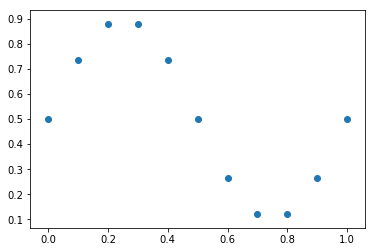

In [502]:
plt.scatter(x, h0)
plt.show()

In [503]:
T.shape

(100, 11)

In [504]:
def P(d):
    return [np.poly1d(np.polyfit(x, t, d).reshape(1,-1)[0]) for t in T]

In [510]:
D = [1,3,6,10]
P_list = np.array([P(d) for d in D])

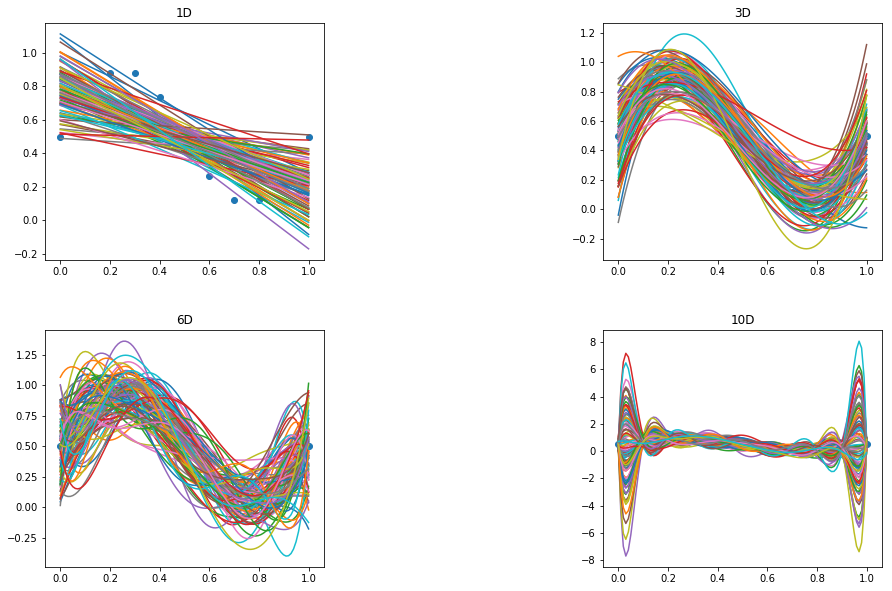

In [512]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=1, hspace=0.3)
for i, p in enumerate(P_list):
    plt.subplot(2, 2, i+1)
    p = P_list[i]
    plt.title(str(D[i]) + 'D')
    xp = np.linspace(0, 1,100)
    plt.scatter(x, h0)
    for i in range(0,len(T)):
        plt.plot(xp, p[i](xp))
plt.show()

In [513]:
def Y(p):
    return np.array([p[i](x) for i in range(0,len(T))])
    
Y_vec = np.array([Y(p) for p in P_list])

In [514]:
def bias(y):
    return (np.square((y.mean(axis=0) - T.mean(axis=0))).mean())

In [515]:
def variance(y):
     return np.square(y - y.mean(axis=0)).mean(axis=0).mean()

In [516]:
bias_list = [bias(y) for y in Y_vec]
pd.DataFrame(bias_list)

,0
0,4.325276e-02
1,1.197884e-03
2,1.099075e-04
3,1.233463e-21


In [517]:
variance_list = [variance(y) for y in Y_vec]
pd.DataFrame(variance_list)

,0
0,0.009339
1,0.018019
2,0.032429
3,0.050520


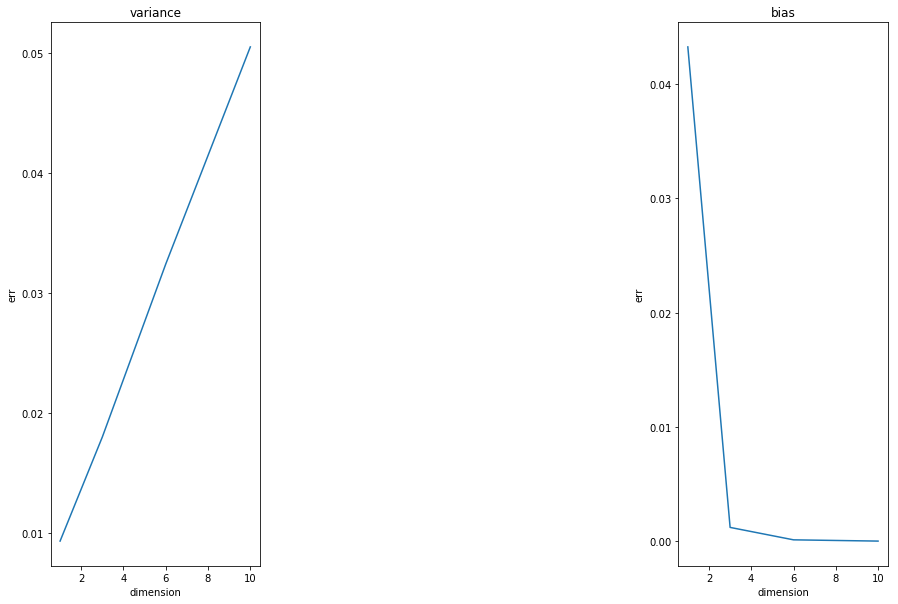

In [518]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=2)

plt.subplot(1, 2, 1)
plt.title('variance')
plt.xlabel('dimension')
plt.ylabel('err')
plt.plot(D, variance_list)

plt.subplot(1, 2, 2)
plt.title('bias')
plt.xlabel('dimension')
plt.ylabel('err')
plt.plot(D, bias_list)

plt.show()

In [519]:
pd.DataFrame(np.array(bias_list) + np.array(variance_list))

,0
0,0.052591
1,0.019217
2,0.032539
3,0.050520


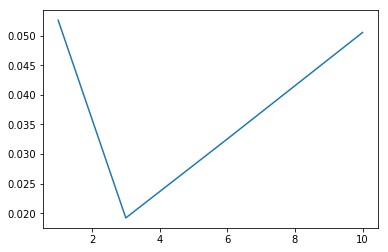

In [520]:
plt.plot(D, np.array(bias_list) + np.array(variance_list))

plt.show()